In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from lib.RedDotsData import RedDotsData
from lib.FolderStructure import FolderStructure


rootDir ="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"
#videoFileName = "V3__R_20180915_205551"
videoFileName = "V4__R_20180915_210447"
#videoFileName = "V6__R_20180915_212238"


#rootDir = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"
#videoFileName = "V3_R_20180911_170159"
#videoFileName = "V2_R_20180911_165730"
#videoFileName = "V1_R_20180911_165259"

folderStruct = FolderStructure(rootDir, videoFileName)


rdd = RedDotsData(folderStruct) #.getRedDotsFilepath())
rdd.getCount()

10621

In [2]:
redDots = rdd.interpolated()
#redDots.head(5)

In [3]:
column_names = ['dir','filename','frameID','createdOn','crabNumber',"crabWidthPixels","crabLocationX", 'crabLocationY',
                'crabCoordinatePoint','cranbCoordinateBox']
crabsDF = pd.read_csv(folderStruct.getCrabsFilepath(),delimiter="\t",na_values="(null)",names = column_names) # 24 errors
#crabsDF.head(10)

In [4]:
res=pd.merge(crabsDF[['dir','filename','frameID',"crabWidthPixels","crabLocationX", 'crabLocationY']], 
             redDots[['frameNumber','mm_per_pixel']],left_on=['frameID'], right_on= ['frameNumber'],how='left')
res["crabWidthMM"]=res["crabWidthPixels"] * res["mm_per_pixel"] 
res.head(10)

,dir,filename,frameID,crabWidthPixels,crabLocationX,crabLocationY,frameNumber,mm_per_pixel,crabWidthMM
0,dir,filename,crabNumber,crabLocationY,crabWidthLine,NaN,NaN,NaN,NaN
1,C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video...,frame002566.jpg,1,1418,"[(1231,1360):(1140,1477)]",NaN,NaN,NaN,NaN
2,C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video...,frame007611.jpg,2,1518,"[(1248,1536):(1347,1524)]",NaN,NaN,NaN,NaN
3,C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video...,frame007906.jpg,3,1480,"[(201,1594):(155,1518)]",NaN,NaN,NaN,NaN


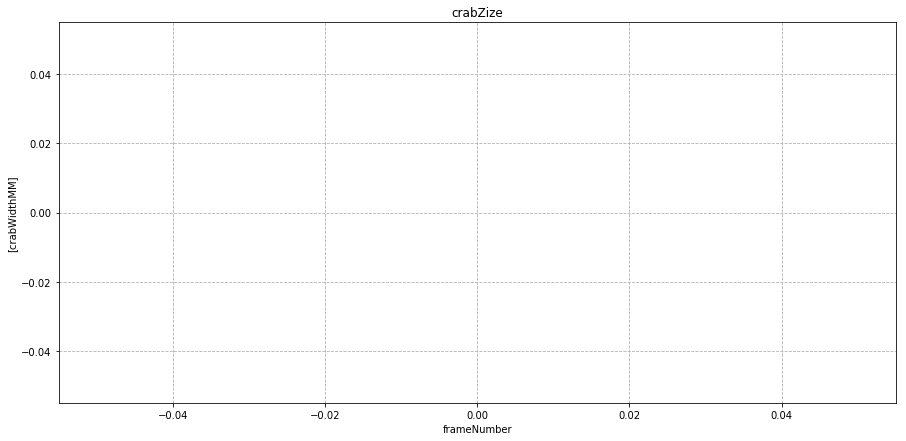

In [5]:
res.plot.scatter(x='frameNumber', y=['crabWidthMM'],figsize=(15,7), title="crabZize")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines